In [1]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
%matplotlib inline
from decimal import Decimal
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, f1_score
pd.options.display.float_format = "{:,.3f}".format
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("FinalDF.csv")
df

,Player,Overall Score,Potential Score,Market Value,Weekly Salary,Height,Weight,Age,Preferred Foot,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,year
0,Lionel Messi,94,97,"78,000,000.000","450,000.000",169,67,27,1,2097,38,3374,43,35.892,18,17.612,187,95,4,0,38,31.432,54.754,19.757,2014
1,Cristiano Ronaldo,92,92,"55,500,000.000","325,000.000",185,80,29,0,2371,35,3103,48,39.309,16,13.601,225,76,5,1,38,30.390,43.608,7.520,2014
2,Robin van Persie,89,89,"30,000,000.000","240,000.000",187,71,31,1,4387,27,2126,10,11.603,2,2.986,76,27,5,0,9,10.081,12.918,1.689,2014
3,Sergio Agüero,88,90,"42,000,000.000","190,000.000",172,74,26,0,619,33,2551,26,25.270,8,5.569,148,33,4,0,21,20.703,27.805,6.878,2014
4,Bastian Schweinsteiger,88,88,"27,500,000.000","180,000.000",183,79,30,0,907,20,1361,5,2.175,4,2.219,29,31,4,0,5,2.175,7.017,4.264,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11202,Matthieu Udol,68,75,"1,100,000.000","5,900.000",178,68,24,1,5745,10,797,0,0.064,1,1.524,3,10,1,1,0,0.064,2.182,0.693,2020
11203,Felix Passlack,68,78,"1,400,000.000","17,000.000",170,74,22,0,2663,6,343,1,0.510,0,0.240,5,3,0,0,1,0.510,1.801,1.051,2020
11204,Andrea Favilli,68,78,"1,500,000.000","6,500.000",191,78,23,1,1997,7,267,2,1.872,0,0.112,13,2,1,0,2,1.872,2.521,0.638,2020
11205,Hidde ter Avest,68,76,"1,200,000.000","5,300.000",182,78,23,0,7000,6,348,0,0.000,0,0.000,0,0,0,0,0,0.000,1.647,1.647,2020


In [3]:
df.iloc[10928,]

Player             Patrick Bamford
Overall Score                   72
Potential Score                 75
Market Value         4,000,000.000
Weekly Salary           43,000.000
Height                         185
Weight                          71
Age                             27
Preferred Foot                   1
id                             822
games                           18
time                          1556
goals                           10
xG                          10.654
assists                          2
xA                           1.021
shots                           65
key_passes                       9
yellow_cards                     1
red_cards                        0
npg                              9
npxG                         9.892
xGChain                     12.718
xGBuildup                    2.330
year                          2020
Name: 10928, dtype: object

In [4]:
df1 = df.drop("Player", axis=1)

In [5]:
train = df1.drop(df.loc[df1['year']==2020].index)
test = df1[df1['year']==2020]
x_train = train.drop('Market Value', axis=1)
y_train = train['Market Value']
x_test = test.drop('Market Value', axis=1)
y_test = test['Market Value']

In [6]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
model.score(x_test,y_test)

0.7963459719284838

In [7]:
df2 = df.drop("Player", axis=1)
df2['xgchain_permin'] = df2['xGChain']/df2['time']
df2 = df.drop(["Player", 'id', "yellow_cards", "red_cards"], axis=1)


In [8]:
train = df2.drop(df2.loc[df2['year']==2020].index)
test = df2[df2['year']==2020]

x_train = train.drop('Market Value', axis=1)
y_train = train['Market Value']
x_test = test.drop('Market Value', axis=1)
y_test = test['Market Value']

In [9]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
model.score(x_test,y_test)

0.7976653187183168

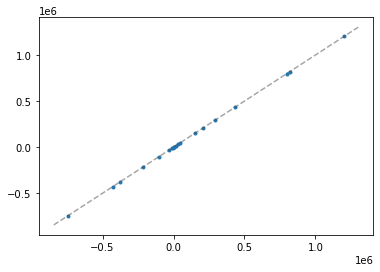

In [10]:
fig, ax = plt.subplots()
ax.plot(model.coef_, model.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)


In [11]:
df_name = df
data = np.array(df_name['Player']) 
player_name = pd.Series(data)


In [12]:
df3 = df.drop("Player", axis=1)
df3.drop(['id', "yellow_cards", "red_cards"], axis=1, inplace=True)
df3['goals_assist'] = (df3['goals']+df3['assists'])
#df3['shots_key_passes'] = (df3['shots']+df3['key_passes'])/df3['time']
#df3.drop(['goals', "assists", "shots", "key_passes"], axis=1, inplace=True)

In [13]:
train = df3.drop(df3.loc[df3['year']==2020].index)
test = df3[df3['year']==2020]

x_train = train.drop('Market Value', axis=1)
y_train = train['Market Value']
x_test = test.drop('Market Value', axis=1)
y_test = test['Market Value']

In [14]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
model.score(x_test,y_test)

0.7976653187183231

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 3472747.172771023
Mean Squared Error: 30346615641953.457
Root Mean Squared Error: 5508776.238145225


In [18]:
pd.DataFrame({'Player': player_name[9516:],'Actual': y_test, 'Predicted': y_predicted})

,Player,Actual,Predicted
9516,Lionel Messi,"95,500,000.000","83,946,544.315"
9517,Cristiano Ronaldo,"58,500,000.000","66,017,063.521"
9518,Virgil van Dijk,"90,000,000.000","45,866,056.203"
9519,Jan Oblak,"77,500,000.000","33,480,773.262"
9520,Kevin De Bruyne,"90,000,000.000","62,293,564.883"
...,...,...,...
11202,Matthieu Udol,"1,100,000.000","2,724,415.018"
11203,Felix Passlack,"1,400,000.000","4,876,350.552"
11204,Andrea Favilli,"1,500,000.000","3,191,133.441"
11205,Hidde ter Avest,"1,200,000.000","2,716,524.134"


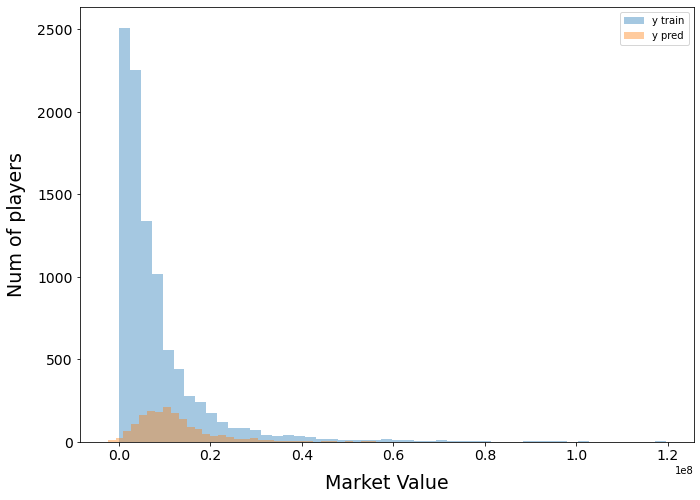

In [17]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_train, kde=False, bins=50, label='y train')
sns.distplot(y_predicted, kde=False, bins=50, label='y pred')
plt.xlabel('Market Value', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Num of players', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');

In [31]:
df4 = df.drop("Player", axis=1)
df4.drop(["id" , "yellow_cards", "red_cards", "npg"], axis=1, inplace=True)

In [32]:
train = df4.drop(df4.loc[df4['year']==2020].index)
test = df4[df4['year']==2020]

x_train = train.drop('goals', axis=1)
y_train = train['goals']
x_test = test.drop('goals', axis=1)
y_test = test['goals']

In [33]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
model.score(x_test,y_test)

0.8130455290609074

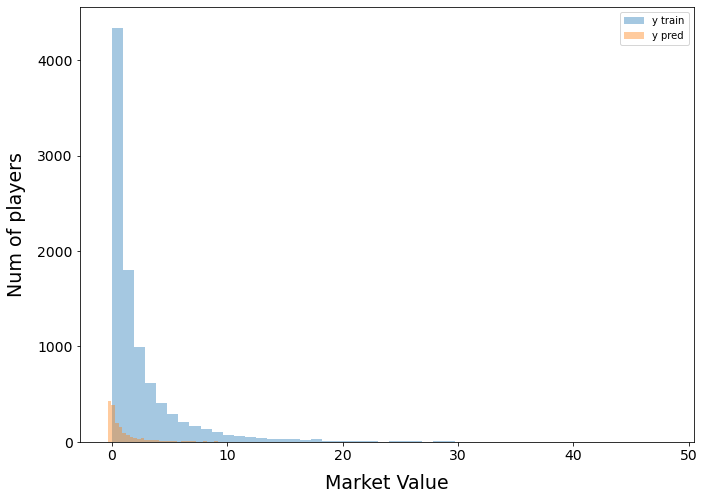

In [34]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_train, kde=False, bins=50, label='y train')
sns.distplot(y_predicted, kde=False, bins=50, label='y pred')
plt.xlabel('Market Value', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Num of players', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.5407897090876934
Mean Squared Error: 0.7637838166663377
Root Mean Squared Error: 0.8739472619479608


In [43]:
df44 = pd.DataFrame({'Player': player_name[9516:], 'Actual Goals': y_test, 'Predicted Goals': y_predicted})
#df44.sort_values('Actual Goals', ascending=False).head(15)
print('Linear Regression comparison between Actual and Predicted goals')
df44.head(20)
df44.sort_values(['Predicted Goals'], ascending=False).head(20)

Linear Regression comparison between Actual and Predicted goals


,Player,Actual Goals,Predicted Goals
9521,Robert Lewandowski,21,15.525
9516,Lionel Messi,11,14.163
9517,Cristiano Ronaldo,15,13.480
9570,Jamie Vardy,11,13.267
10021,André Silva,12,12.007
9578,Romelu Lukaku,12,11.936
9528,Harry Kane,12,11.876
10928,Patrick Bamford,10,10.796
9524,Mohamed Salah,13,10.658
9754,Wout Weghorst,11,10.508
